<a href="https://colab.research.google.com/github/osidirop/tensorflow/blob/main/Recognize_hand_written_digits_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [ ]:
import tensorflow as tf


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    #print(logs.get('accuracy'))
     if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True    

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path="mnist.npz")
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize images

callbacks = myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model fitting
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3447 - accuracy: 0.8981
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0837 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0517 - accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0352 - accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0242 - accuracy: 0.9928

Reached 99% accuracy so cancelling training!


In [ ]:
# model prediction
model.evaluate(x_test, y_test)
classifications = model.predict(x_test)
print(classifications[0])
print(y_test[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9786
[5.6415178e-11 2.5158073e-10 9.9927524e-07 1.7217806e-05 6.5573876e-13
 2.5327790e-10 2.6791316e-13 9.9998176e-01 7.2208189e-10 1.4576166e-07]
7


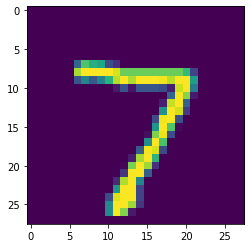

In [ ]:


import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
#print(y_test[0])
#print(x_test[0])

